* File copied from http://www.ssa.gov/oact/babynames/limits.html

In [38]:
%matplotlib inline

In [39]:
import pandas as pd
import numpy as np
# from IPython.display import display, HTML

In [40]:
names1880 = pd.read_csv('names/yob1880.txt', names=['names','sex','births'])

In [41]:
names1880[:5]

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [42]:
names1880.groupby('sex').sum()

,births
sex,
F,90992
M,110490


** use "pandas.concat" to combine multiple data files **

In [43]:
years = range(1880, 2011)

In [44]:
pieces = []
columns = ['names','sex','births']

In [45]:
for year in years:
    path = 'names/yob%s.txt'% year
    #print path
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [46]:
# pandas.concat operates on list of dataframe, ignore_index=True means the order of rows won't be preserved
names = pd.concat(pieces, ignore_index=True)

In [47]:
names[:10]

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


** When group data with 2 features, pivot_table use 1 feature as the index(for each row), the other feature as the columns **

In [48]:
total_birth = names.pivot_table('births', index='year',columns='sex',aggfunc=sum)

In [49]:
total_birth[:5]

sex,F,M
year,,
1880,90992,110490
1881,91953,100743
1882,107848,113686
1883,112318,104627
1884,129020,114443


In [50]:
total_birth.tail()

sex,F,M
year,,
2006,1898776,2052652
2007,1919775,2072505
2008,1887660,2036750
2009,1833461,1979895
2010,1773440,1914629


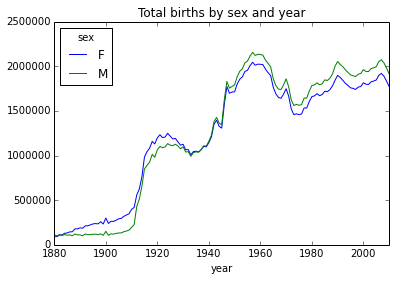

In [51]:
total_birth.plot(title='Total births by sex and year')

In [52]:
# add proportion of count of each name in the total baby count
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births/births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

** The prop is based on each group. When the "add_prop" is applied, it's applying on each group's rows. **

In [53]:
names[:5]

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189


In [56]:
# Sanity check to see if the sum of prop is close to 1
np.allclose(names.groupby(['year','sex']).prop.sum(), 1)

True